# Stationary Analysis
Check for stationarity and apply differencing if needed.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [8]:
data = pd.read_csv('../data/regional_univariate_data.csv', index_col=0)
data = data.loc['2020-01-22':'2022-09-15']

<AxesSubplot:xlabel='date'>

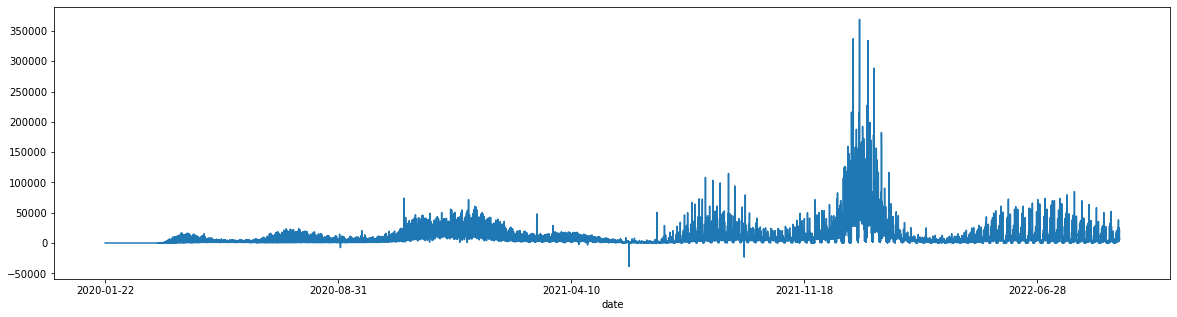

In [9]:
plt.figure(figsize=(20, 5))
data.new_confirmed.plot()

In [10]:
# use ADF test to check for stationarity
# if the test statistic is less than the critical value and the p-value is small (commonly <0.05), 
# the null hypothesis can be rejected, suggesting the time series is stationary.
def adf(series: pd.Series):
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    for ind in ['Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']:
        if dfoutput['Test Statistic'] < dfoutput[ind] and dfoutput['p-value'] < 0.05:
            print('Series is stationary at ' + ind)
            return
    print('Series is not stationary')
    

In [11]:
# check for stationarity on entire dataset
series = data.new_confirmed.groupby(data.index).sum()
series.index = pd.to_datetime(series.index)
series = series.asfreq('d')
adf(series)

Test Statistic                  -4.407424
p-value                          0.000288
#Lags Used                      21.000000
Number of Observations Used    946.000000
Critical Value (1%)             -3.437281
Critical Value (5%)             -2.864600
Critical Value (10%)            -2.568399
dtype: float64
Series is stationary at Critical Value (1%)


In [12]:
for group, df in data.groupby('region'):
    print(group)
    series = df['new_confirmed']
    series.index = pd.to_datetime(series.index)
    series = series.asfreq('d')
   
    # ADF test
    adf(series)
    print("\n")

East North Central
Test Statistic                  -3.915392
p-value                          0.001924
#Lags Used                      20.000000
Number of Observations Used    947.000000
Critical Value (1%)             -3.437274
Critical Value (5%)             -2.864597
Critical Value (10%)            -2.568398
dtype: float64
Series is stationary at Critical Value (1%)


East South Central
Test Statistic                  -5.190942
p-value                          0.000009
#Lags Used                      19.000000
Number of Observations Used    948.000000
Critical Value (1%)             -3.437267
Critical Value (5%)             -2.864594
Critical Value (10%)            -2.568396
dtype: float64
Series is stationary at Critical Value (1%)


Mid-Atlantic
Test Statistic                  -3.837239
p-value                          0.002548
#Lags Used                      22.000000
Number of Observations Used    945.000000
Critical Value (1%)             -3.437289
Critical Value (5%)          

### Findings 

series are stationary for all 9 regions at 1% via ADF tests
as well as the entire dataset grouped by date